In [23]:
what_we_are_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
    }

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

# Set the device
device = "cpu" #if torch.mps.is_available() else "cpu"

# Set the device globally
torch.set_default_device(device)

In [25]:
torch.mps.is_available()

True

In [26]:
torch.__version__

'2.5.1'

                                                    Data preparing  

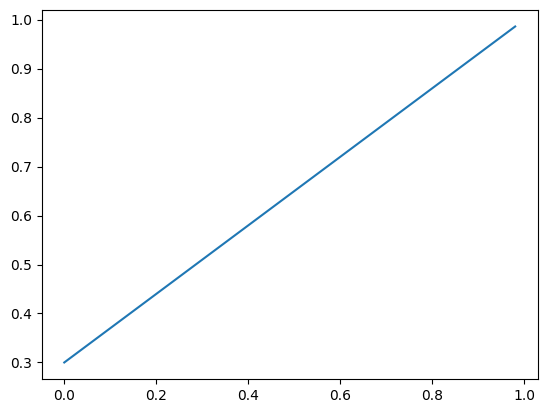

In [27]:

#This cell runs on cpu to use gpu run the next cell
# Create *known* parameters
weight = 0.7
bias = 0.3
#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

#Plot the data
plt.plot(X, y)
plt.show() 


In [28]:
'''#Use this cell if you want to run on gpu
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.001
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Convert tensors to CPU and then to NumPy for plotting
X_np = X.cpu().numpy()
y_np = y.cpu().numpy()

# Plot the data
plt.plot(X_np, y_np)
plt.show()

# If you still want to see the tensor values
print("X[:10]:", X[:10])
print("y[:10]:", y[:10])'''

'#Use this cell if you want to run on gpu\n# Create *known* parameters\nweight = 0.7\nbias = 0.3\n\n# Create data\nstart = 0\nend = 1\nstep = 0.001\nX = torch.arange(start, end, step).unsqueeze(dim=1)\ny = weight * X + bias\n\n# Convert tensors to CPU and then to NumPy for plotting\nX_np = X.cpu().numpy()\ny_np = y.cpu().numpy()\n\n# Plot the data\nplt.plot(X_np, y_np)\nplt.show()\n\n# If you still want to see the tensor values\nprint("X[:10]:", X[:10])\nprint("y[:10]:", y[:10])'

In [29]:
# Create train/test split
train_split = int(0.8 * len(X)) # %80 of data used for training set, %20 for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [30]:
# Creating a function to plot test and train data if using CPU

def plot_predictions_cpu(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7))
    
    # Plot the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot the test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    
    # Plot the predictions in red
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    #Show the legend
    plt.legend(prop={"size": 14})
    

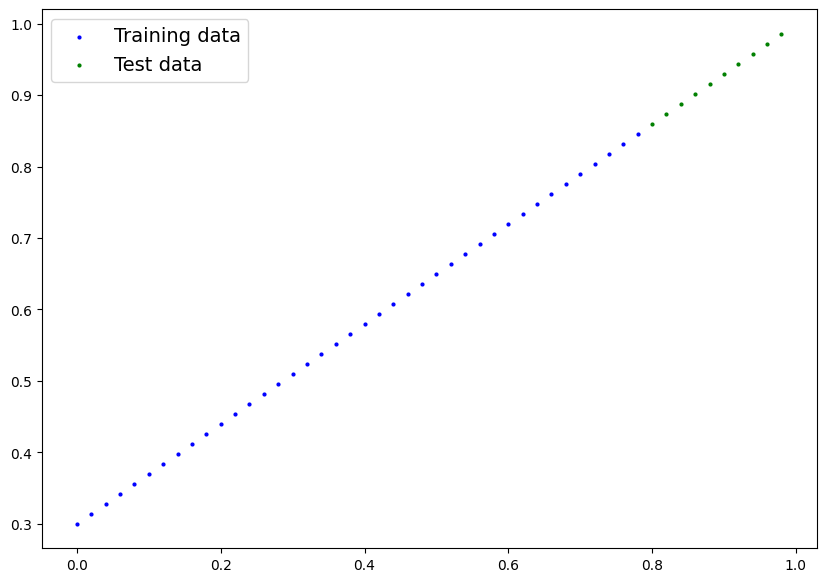

In [31]:
plot_predictions_cpu()

In [32]:
'''# Creating a function to plot test and train data if using GPU

def plot_predictions_gpu(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7))
    
    # Convert tensors to CPU and then to NumPy for plotting
    train_data_np = train_data.cpu().numpy()
    train_labels_np = train_labels.cpu().numpy()
    test_data_np = test_data.cpu().numpy()
    test_labels_np = test_labels.cpu().numpy()
    
    # Plot the training data in blue
    plt.scatter(train_data_np, train_labels_np, c="b", s=4, label="Training data")
    
    # Plot the test data in green
    plt.scatter(test_data_np, test_labels_np, c="g", s=4, label="Test data")
    
    # Plot the predictions in red
    if predictions is not None:
        predictions_np = predictions.cpu().numpy()
        plt.scatter(test_data_np, predictions_np, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size": 14})
    
    plt.show()'''

'# Creating a function to plot test and train data if using GPU\n\ndef plot_predictions_gpu(train_data=X_train,\n                     train_labels=y_train,\n                     test_data=X_test,\n                     test_labels=y_test,\n                     predictions=None):\n\n    plt.figure(figsize=(10, 7))\n    \n    # Convert tensors to CPU and then to NumPy for plotting\n    train_data_np = train_data.cpu().numpy()\n    train_labels_np = train_labels.cpu().numpy()\n    test_data_np = test_data.cpu().numpy()\n    test_labels_np = test_labels.cpu().numpy()\n    \n    # Plot the training data in blue\n    plt.scatter(train_data_np, train_labels_np, c="b", s=4, label="Training data")\n    \n    # Plot the test data in green\n    plt.scatter(test_data_np, test_labels_np, c="g", s=4, label="Test data")\n    \n    # Plot the predictions in red\n    if predictions is not None:\n        predictions_np = predictions.cpu().numpy()\n        plt.scatter(test_data_np, predictions_np, c="r", 

In [33]:
#plot_predictions_gpu()

In [34]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # Almost everything in Pyttorch is a nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with random weights (this will get adjusted as the model learns)
                                    dtype=torch.float32,
                                    requires_grad=True))
        
        self.bias = nn.Parameter(torch.randn(1, # start with random bias (this will get adjusted as the model learns))
                                    dtype=torch.float32,
                                    requires_grad=True))
        
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias

In [35]:
# Checking the contents of PyTorch Model

# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameters) 
model_0 = LinearRegressionModel()

# Check the nn.Parameters within the nn.Module subclass we created 
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
# Making predictions eithout training the model
predictions = model_0(X_test)
predictions



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [38]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [39]:
#plot_predictions_gpu(predictions=y_preds)

In [40]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [41]:
# Create the loss function
loss_fn = nn.L1Loss() # This is the mean absolute error (MAE)

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # This is the learning rate

In [42]:
# Optimization Loop

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty lists to store training and testing loss
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ###Training
    
    #Put model in training mode (this is the default state of a model)
    
    model_0.train()
    # 1. forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    
    #2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward
    loss.backward()
    
    #5. Progress the optimizer
    optimizer.step()
    
    ###Testing
    
    # Put the model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        #1. Forward pass on the test data
        test_pred = model_0(X_test)
        
        #2. Calculate the loss on the test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype so comparisons need to be done with tensors of the same type
        
        #3. Append the training and test loss for every 10 epochs
        if epoch % 10 == 0:
            train_loss_values.append(loss.detach().cpu().numpy())
            test_loss_values.append(test_loss.detach().cpu().numpy())
            epoch_count.append(epoch)
    
    # Print the loss
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        
        

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788740023970604 | MAE Test Loss: 0.06473556160926819 


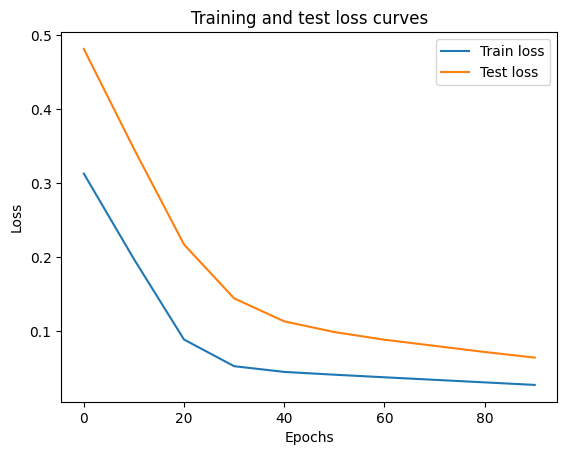

In [43]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [44]:
# Find out our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weight: {weight}, Bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
Weight: 0.7, Bias: 0.3


In [45]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    # 3. Make sure the cauclations are done with the model and data on the same device
    # model_0.to(device)
    # X_test = model_0(X_test)
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

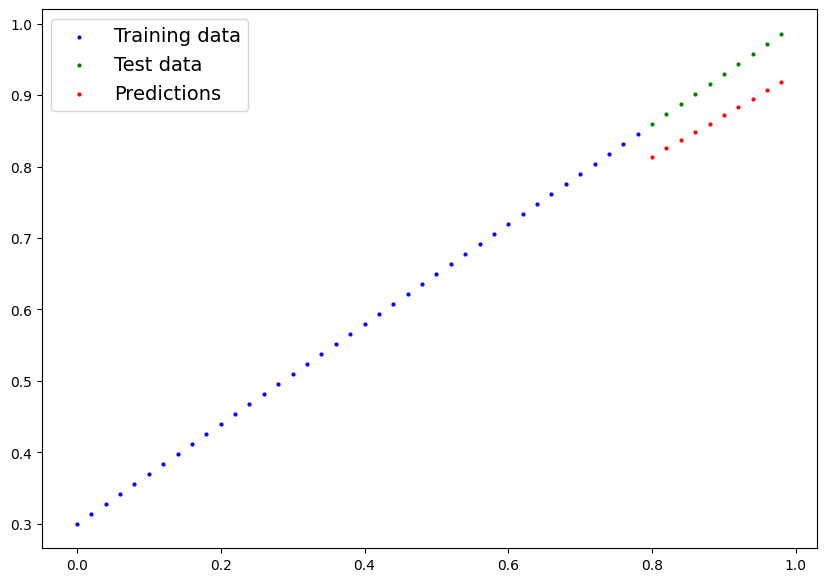

In [46]:
plot_predictions_cpu(predictions=y_preds)

In [47]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [48]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--  1 denizkonuk  staff  1680 Nov 13 22:11 models/01_pytorch_workflow_model_0.pth
